In [3]:
from wmf import wmf 
import numpy as np
import pylab as pl
import pandas as pd
import pickle
import datetime
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
import scipy as scp
import os
import aforos as af
from IPython.display import IFrame
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xlsxwriter
import codecs
from multiprocessing import Pool
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.patches as patche
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
caudalPtar = [1.23,1.45,1.46,1.55,1.41,1.16,1.6,1.5,1.62,1.54,1.29,1.22,1.24]

In [6]:
np.mean(caudalPtar)

1.405384615384615

In [7]:
mainfolder = 'Salidas_Redrio' # nombre de la carpeta principal
hora_inicial = '06:00' # hora de inicio de todas las campañas
hora_final = '18:00' # hora de finalización de todas las campañas
fechas = pd.to_datetime(['2017-02-22','2017-03-08','2017-03-09','2017-04-26','2017-06-21','2017-06-22'])

In [8]:
def aforo(codigo,DEM='dem_amva60',DIR='dir_amva60',aforo=1):
    '''runs aforos module
    Parameters
    ----------
    codigo: id in dbase
    salida: campain folder name
    DEM : dem name
    DIR : dir name
    aforo : flow measurement number or id
    -------
    Returns
        ------
        out: self
        sets module aforos up 
        '''
    self = af.aforos(codigo,aforo=int(aforo),
                    nombre = df_informacion.loc[codigo,'FolderName'])
    self.ruta_dem = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DEM
    self.ruta_dir = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DIR
    self.longitud = float(df_informacion.loc[codigo,'Longitud'])
    self.latitud = float(df_informacion.loc[codigo,'Latitud'])
    self.name = df_informacion.loc[codigo,'Nombre']
    self.municipio = df_informacion.loc[codigo,'Municipio']
    self.direccion = df_informacion.loc[codigo,'Direccion']
    self.barrio = df_informacion.loc[codigo,'Barrio']
    self.subcuenca = df_informacion.loc[codigo,'Subcuenca']
    return self

def runbyid(dfe_id):
    self = aforo(int(dfe.loc[dfe_id,'id_estacion_asociada']),aforo=dfe.loc[dfe_id,'aforo'])
    self.fecha = pd.to_datetime(dfe.loc[dfe_id,'fecha'])
    self.date = self.fecha.strftime('%Y-%m-%d %H:%M')
    return self

In [9]:
hora_inicial = '06:00'
hora_final = '18:00'
df_informacion = pd.read_csv('../information/info_redrio.csv',index_col=0)
#dfe = pd.read_csv('../information/salidas_21y22_junio.csv',index_col=0)
texto = ['% ----------------------------------------------',
         '% ---------------------TEXTO AQUÍ---------------',
         '% ----------------------------------------------']

In [10]:
fecha = pd.to_datetime('2017-03-08')
dfe = pd.read_csv('../information/20170308_dfe.csv',index_col=0)
nombre_salida = u'Campaña 08 de Marzo'

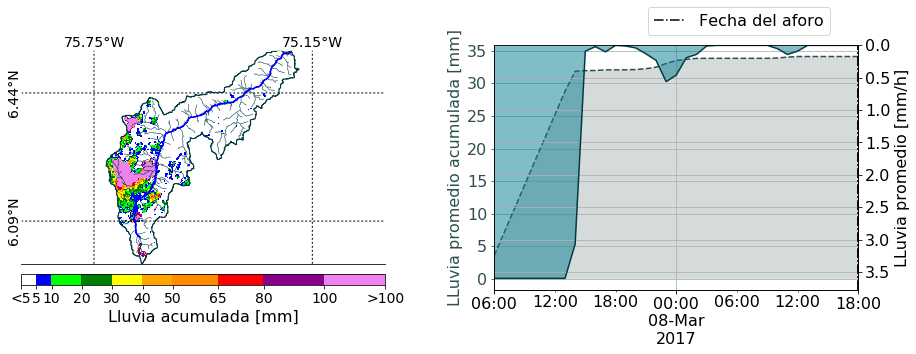

In [11]:
self = aforo(1061)
self.fecha = fecha+datetime.timedelta(hours=18)
#self.get_rain()
self.simubasin(rute=True,show=False)
rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                  fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                  ruta='%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),
                  formato='png')

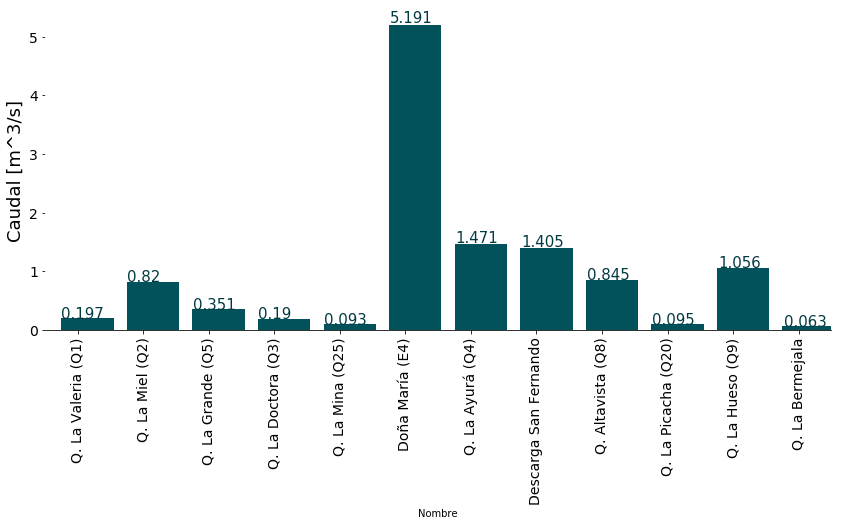

In [14]:
resumen = df_informacion.loc[dfe['id_estacion_asociada'].values].set_index('Nombre')
resumen['caudal_medio']= dfe['caudal_medio'].values
self.plot_resumen_flow(resumen['caudal_medio'],'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')))

In [ ]:
point = df_informacion.loc[dfe['id_estacion_asociada'].values].sort_values(by='Latitud')
self.Plot_Mapa2(add_scatter=[point['Longitud'].values,point['Latitud'].values],\
                title =nombre_salida,Logo='SIATA2.png',\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                add_stations=map(lambda x:x.decode('utf-8'),point['Nombre'].values),\
                geaoref=[6.265,5.975,-75.725,(-75.725+0.3)],clim=[1300,3400],fontsize=24,\
                Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061')

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)
plt.savefig('%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),format='png',bbox_inches='tight')


# Tabla resultados

In [8]:
nombre_salida = 'Campaña 08 de Marzo'
caption = 'Parámetros hidráulicos %s'%nombre_salida
columns = ['Caudal medio','Velocidad media','Área','Perímetro','Altura media','Rádio hidráulico']
cellwidth = [30]+6*[70/6]
df_latex = dfe[['caudal_medio','velocidad_media','area_total','perimetro','altura_media','radio_hidraulico']]
df_latex.index = df_informacion.loc[dfe['id_estacion_asociada'].values]['Nombre'].values
tabla=self.latex_table_from_df(df_latex,caption,'tab:%s'%fecha.strftime('%Y%m%d'),columns,cellwidth,width=5.6)

0
1
2
3
4
5
6
8
9
10
11


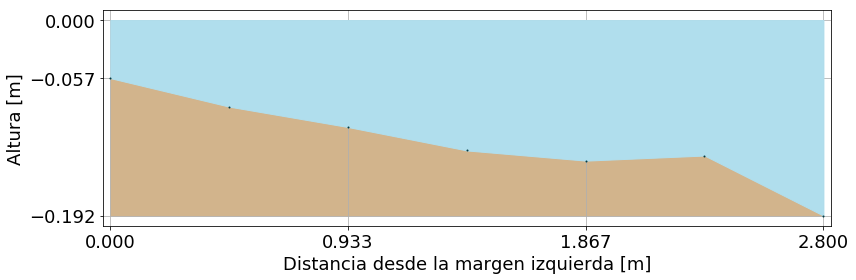

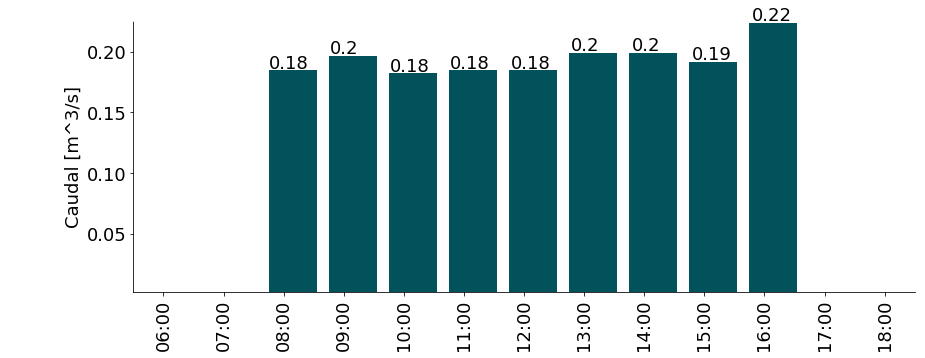

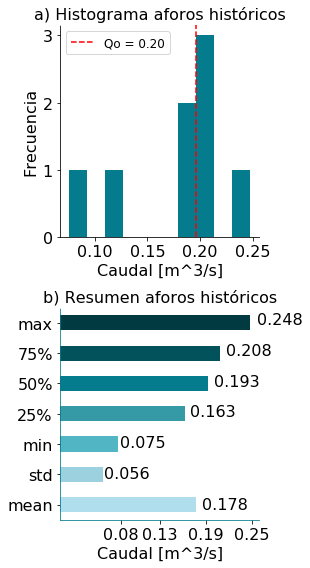

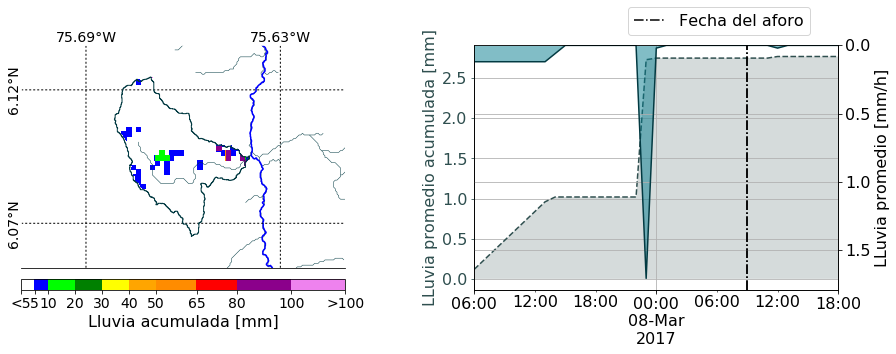

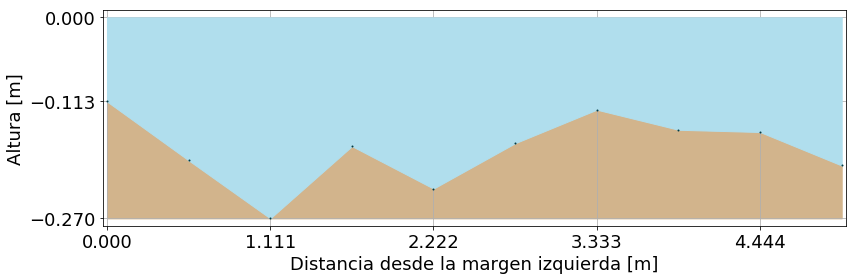

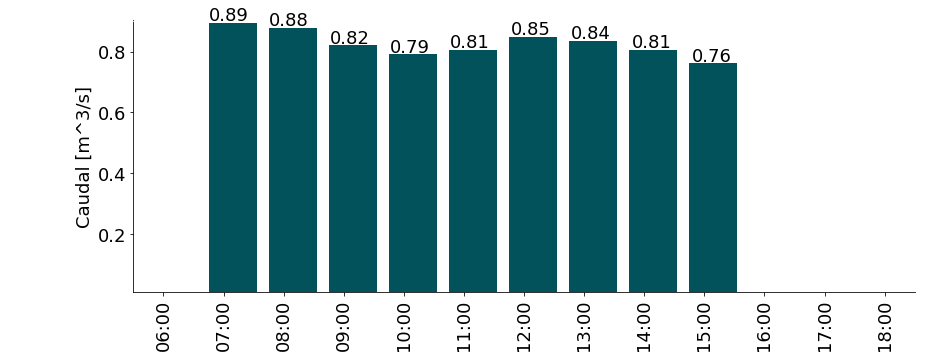

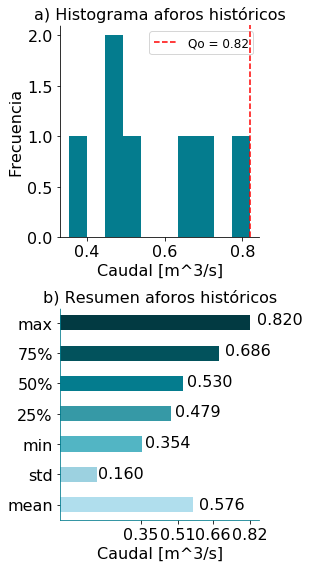

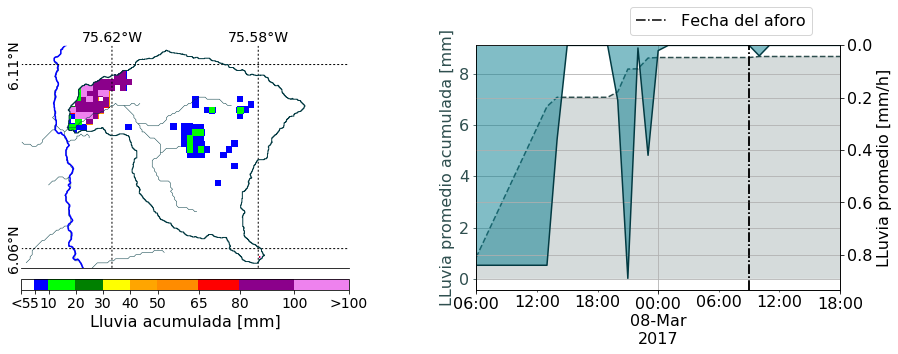

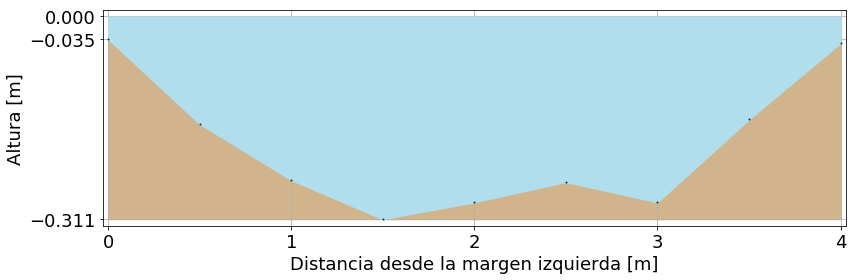

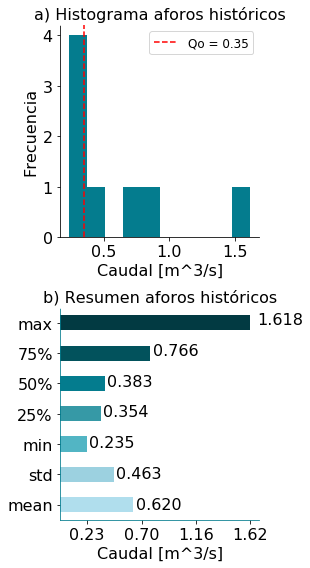

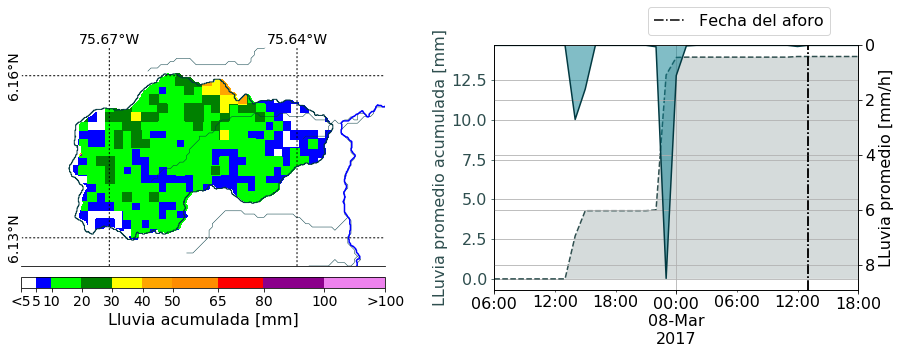

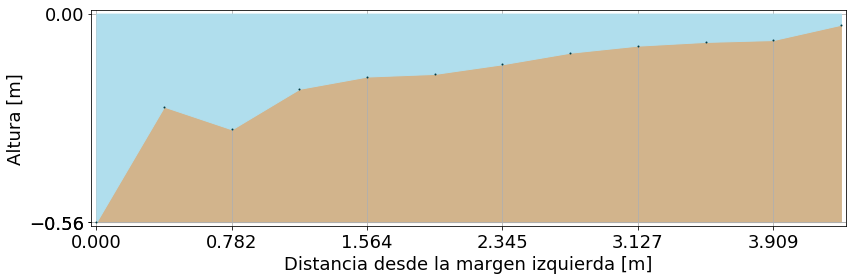

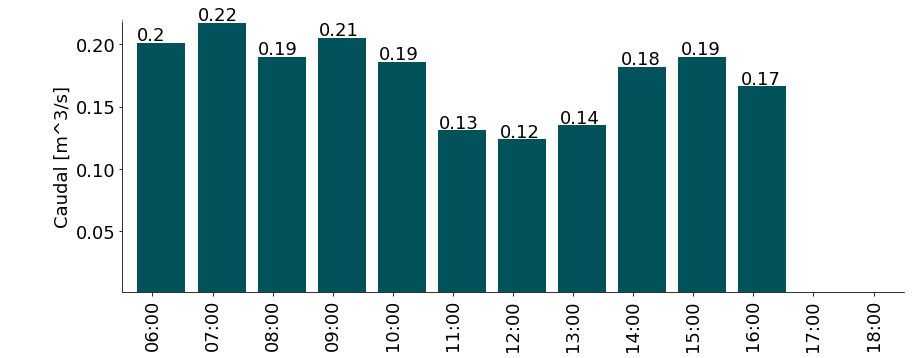

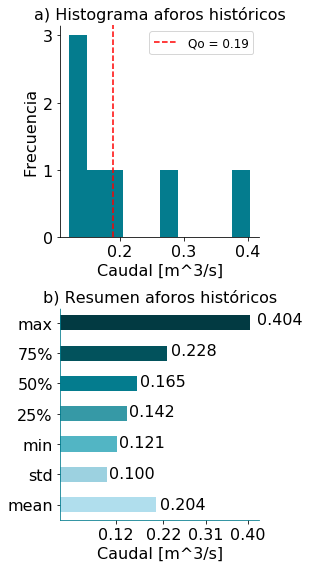

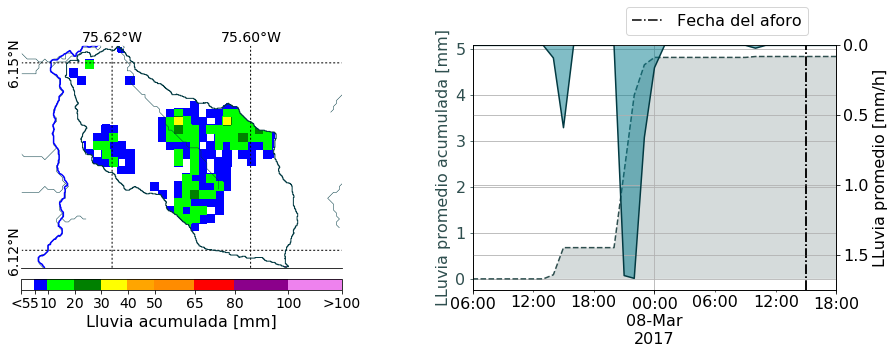

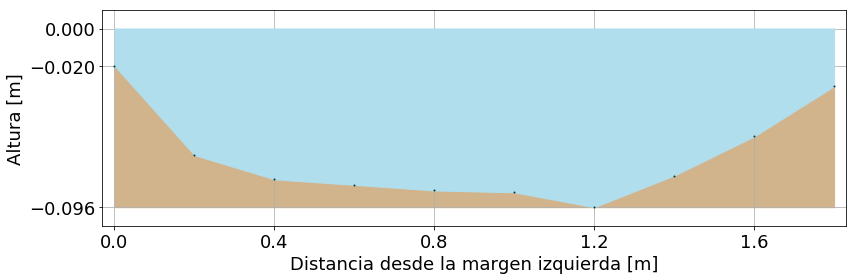

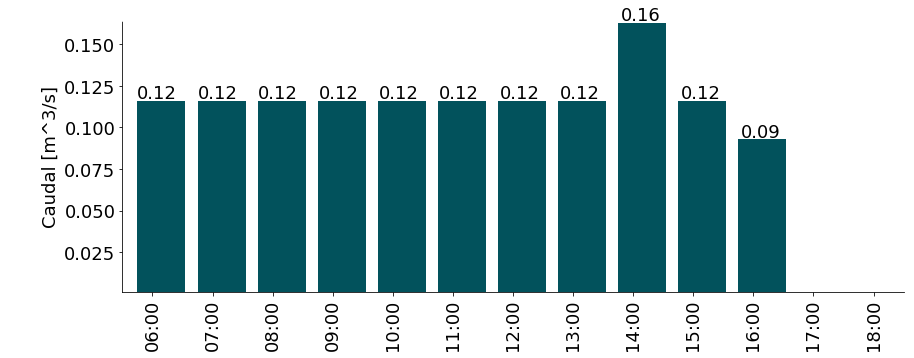

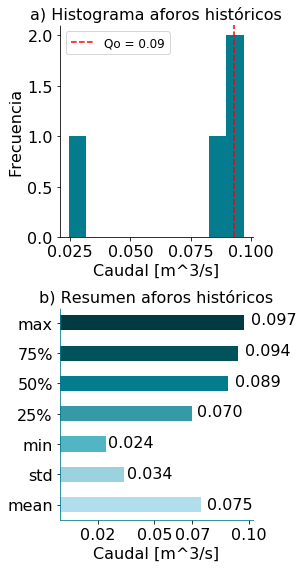

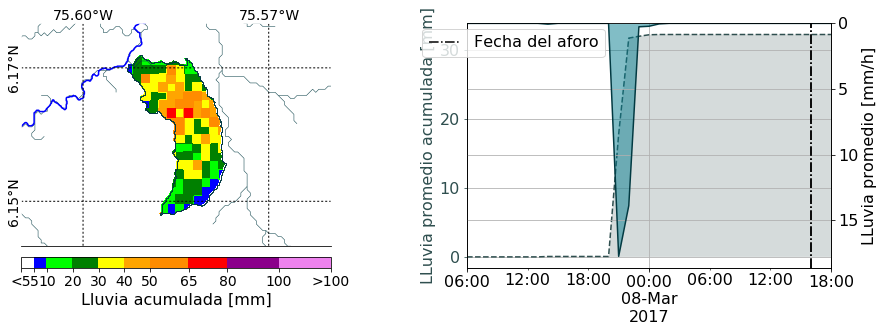

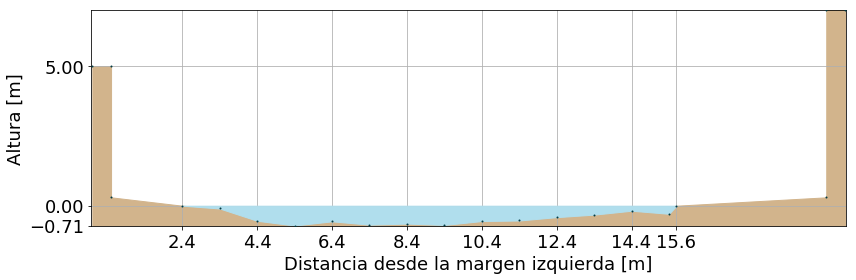

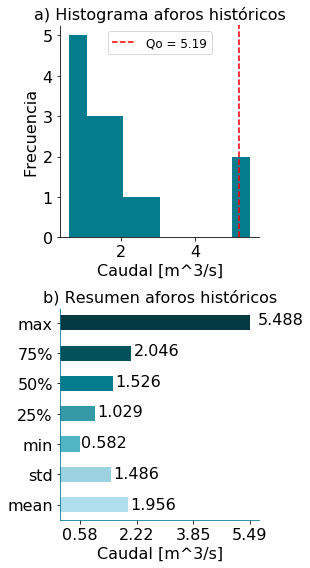

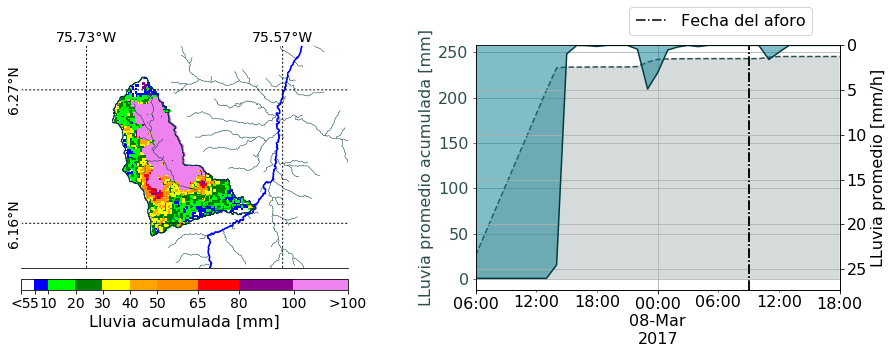

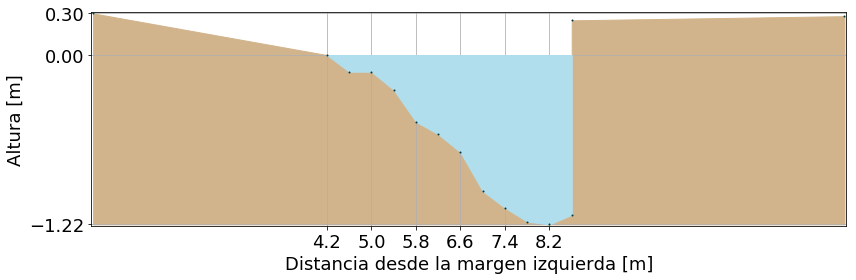

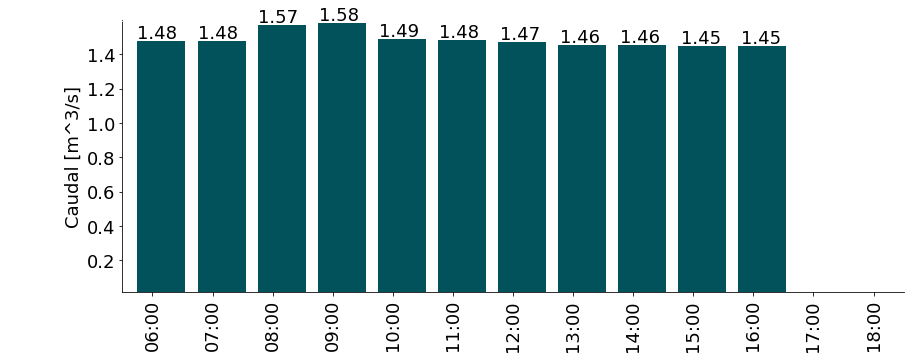

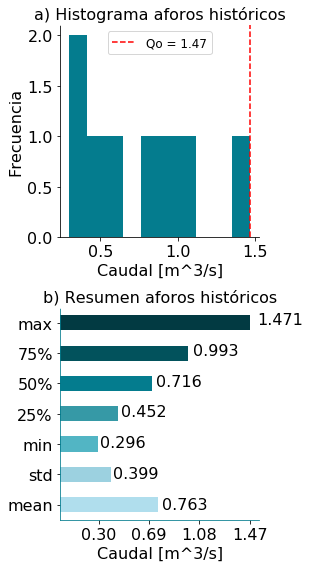

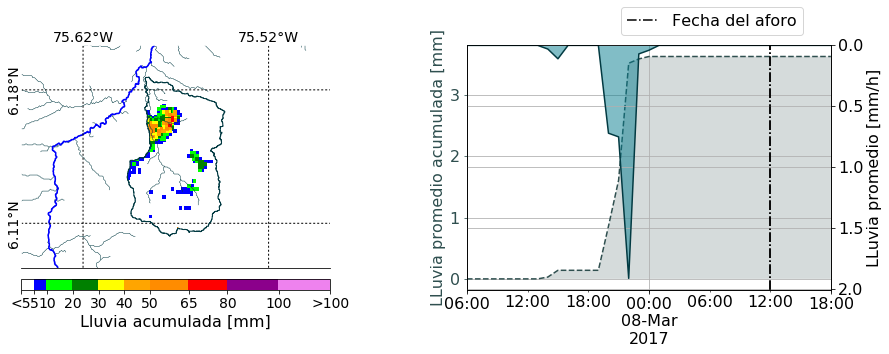

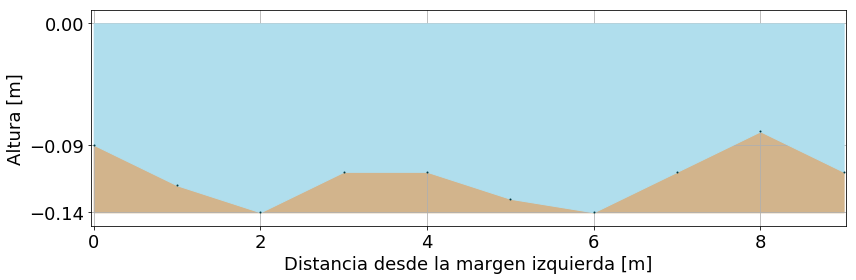

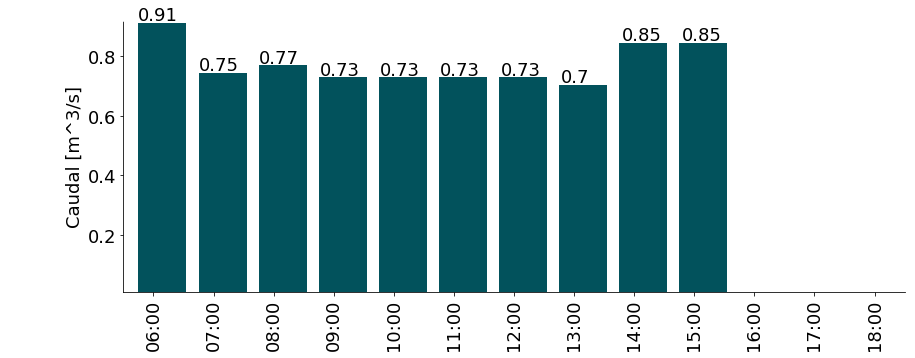

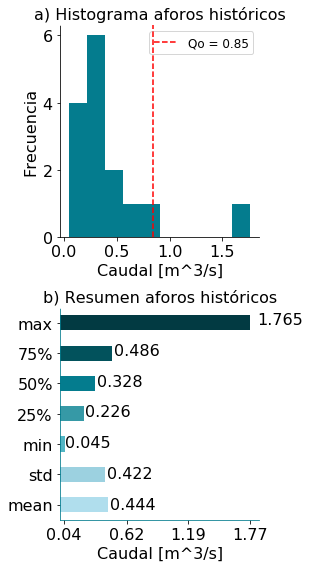

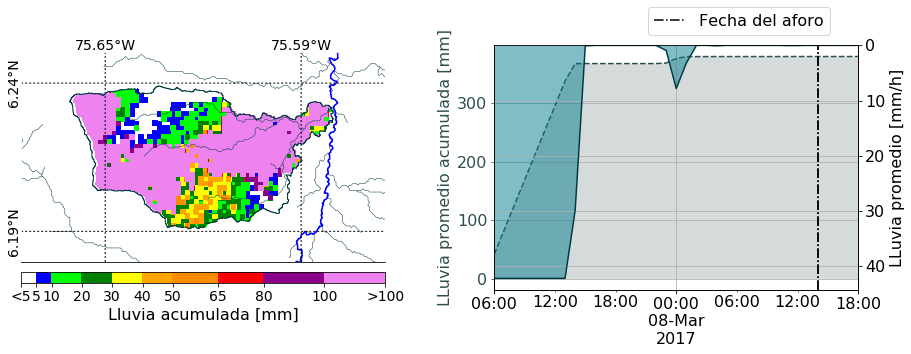

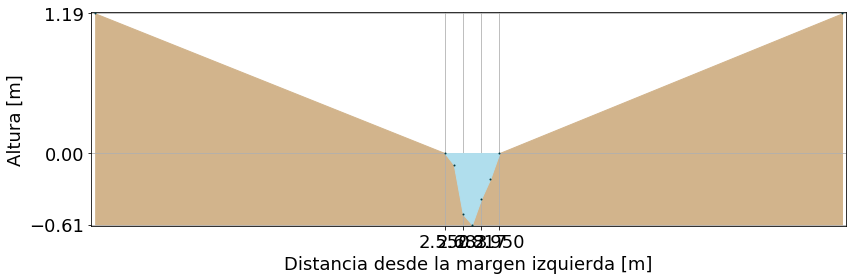

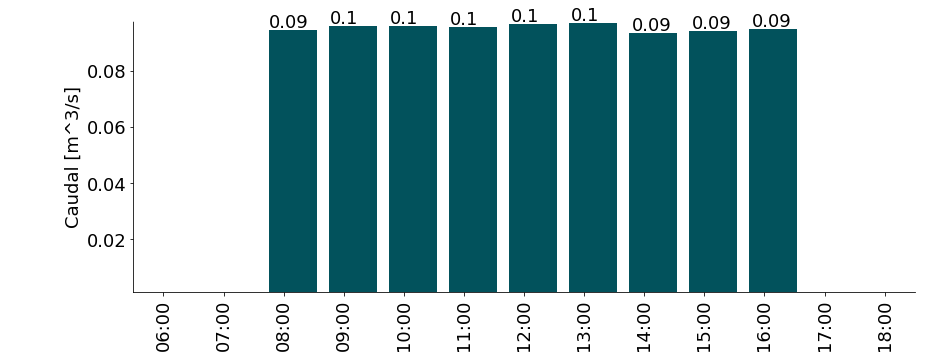

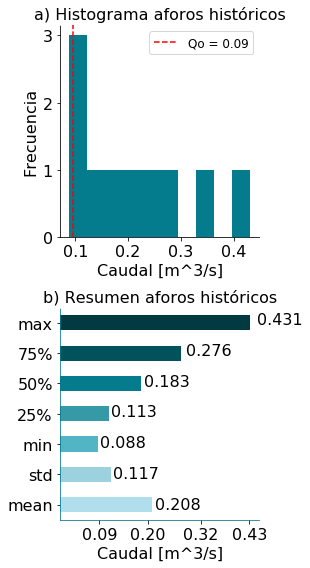

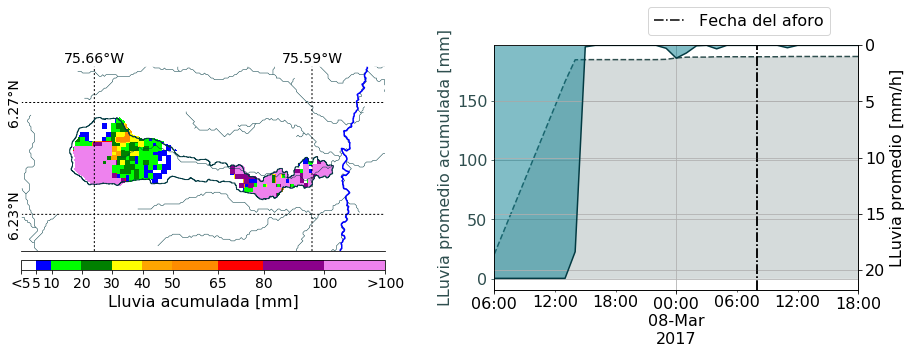

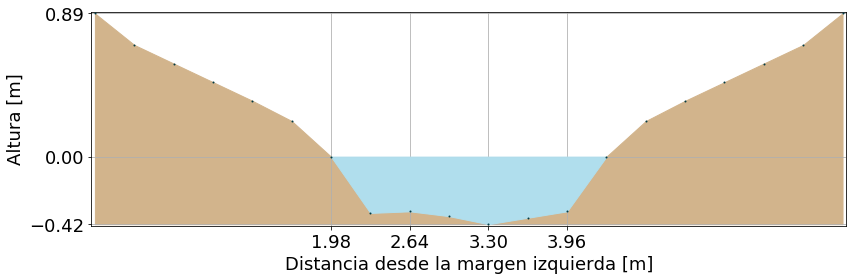

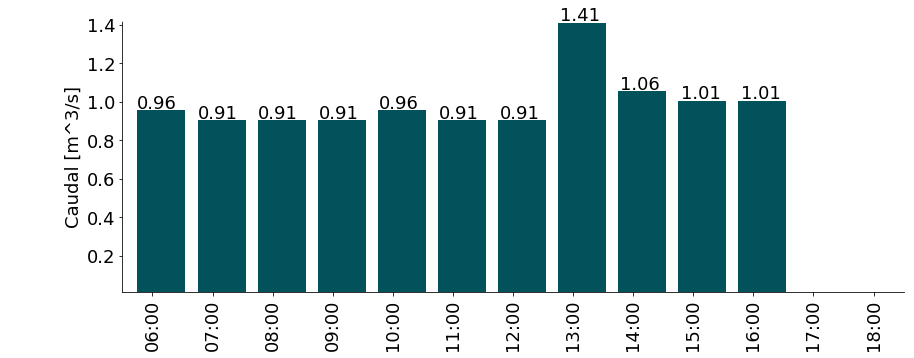

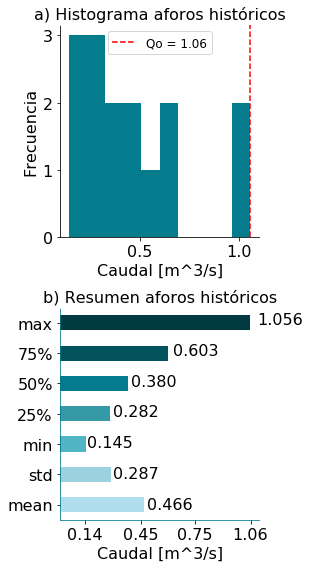

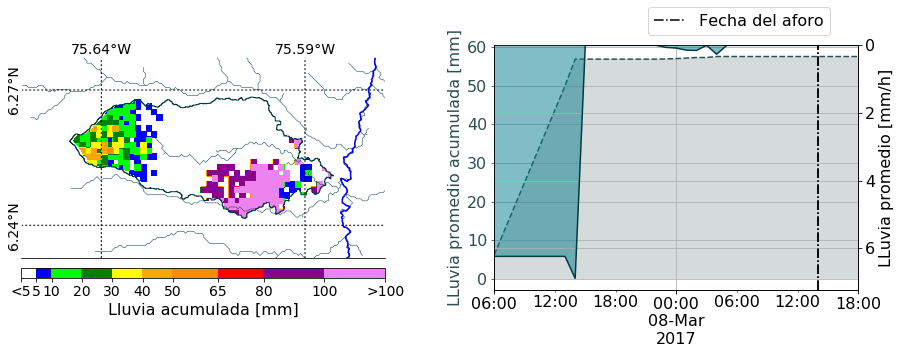

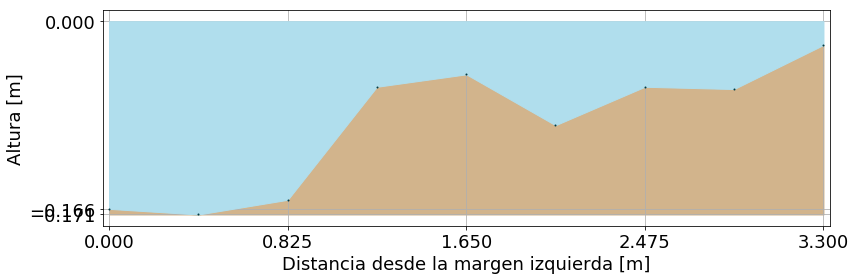

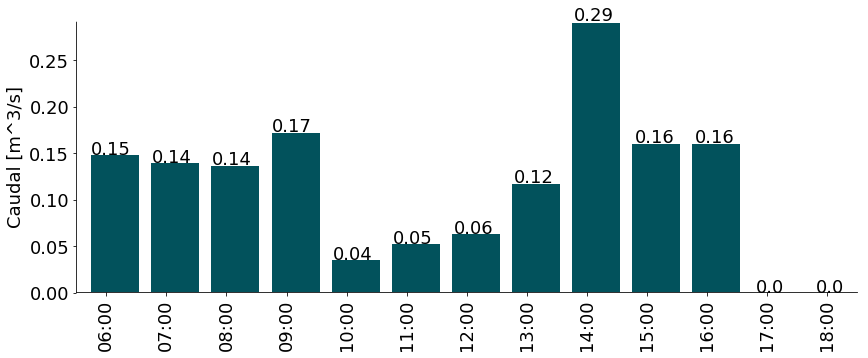

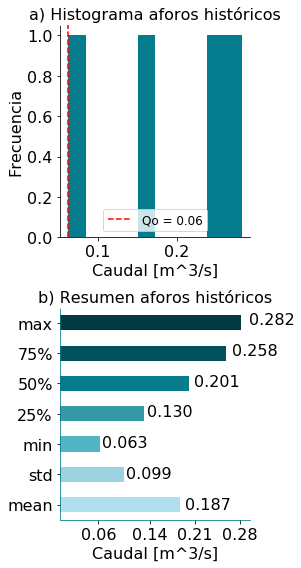

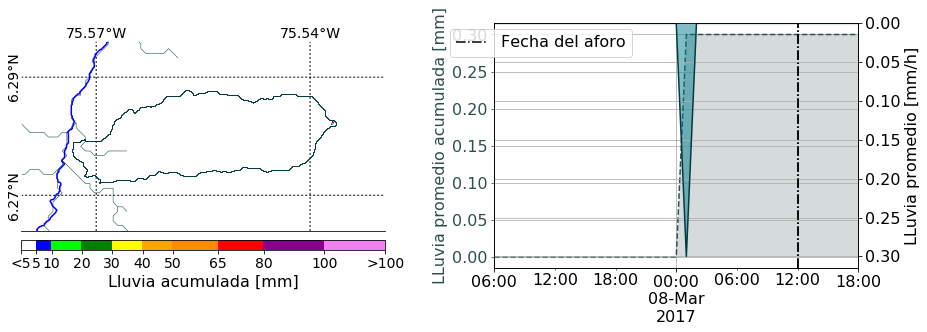

In [13]:
def latex_hidrologia(self,caudal,ruta_fig,label):
        difiere = round(((caudal/self.caudales_historicos.median().values[0])-1.0)*100,3)
        plot_figure = []
        plot_figure.append('\\begin{multicols}{2}')
        plot_figure.append('La figura \\ref{%s} está construida con datos de aforos históricos realizado sobre la misma sección, el recuadro superior es un histograma de frecuencias, mientras que el recuadro inferior es un resumen con los estadísticos más importantes. En total se cuenta con %d aforos, el caudal observado difiere de la mediana histórica %.3f $[m^3/s]$ en un %.2f porciento.'%(label,self.caudales_historicos.index.size,self.caudales_historicos.median().values[0],difiere))                           
        plot_figure.append('{\\centering')
        plot_figure.append('\\includegraphics[width=5.0cm]{{%s}}'%(ruta_fig))
        plot_figure.append('\\captionof{figure}{\small Información de Aforos históricos %s}'%self.name)
        plot_figure.append('\\label{%s}'%label)
        plot_figure.append('}')
        plot_figure.append('\\end{multicols}')
        return plot_figure



resultados = ['']
resultados.append('\\section{%s}'%nombre_salida)
    #--plot map_campain
resultados+=self.latex_figure(17,'%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Mapa %s'%nombre_salida,'fig:%smapcamp'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Lluvia %s'%nombre_salida,'fig:%srain'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Resultados %s'%nombre_salida,'fig:%sflux'%(fecha.strftime('%Y%m%d')))
resultados+=tabla

df = pd.DataFrame.copy(dfe)
df_alturas = pd.read_csv('../information/%s_heights.csv'%fecha.strftime('%Y%m%d'),index_col=0)
df_alturas.columns = np.array(df_alturas.columns,int)
for i in df.index:
    self = runbyid(i)
    if df.loc[i,'aforo_especial']==1:
        self.dispositivo = '-999'
        resultados+= ['\\subsection{%s}\\'%self.name]
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            resultados+= self.latex_figure(17,'%s/curva_gabino.png'%(fecha.strftime('%Y%m%d')),
                                  'Caudales estimados a partir de curva de calibración',
                                  'fig:%scurva'%(fecha.strftime('%Y%m%d')))
            resultados += ['\\clearpage'] 
    else:
        self.get_resultados_mysql()
        self.dispositivo = self.dfr.loc['dispositivo','Resultado']
        self.plot_section(wet=self.verticales,
                    lev=self.levantamiento,
                    figsize=(12,4),
                    fontsize=18,
                    sepx=0.03,
                    sepy=0.01,
                    filepath='%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados += self.latex_results_table('tab:%s_hidroparam_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        lbl = '\\ref{tab:%s_hidroparam_%s}'%(fecha.strftime('%Y%m%d'),self.nombre)
        resultados+=['El aforo se realizó en la fecha %s, el caudal obtenido fue de %s $[m^3/s]$. La sección aforada tiene un ancho superficial que mide %s [m], la altura promedio de la lámina de agua es de %s [m], la altura máxima se ubica a %s [m] de la margen izquierda del canal con un valor de %s [m]. Para el cálculo de velocidades se utilizó el dispositivo %s, el valor medio de velocidad obtenido fue de %s $[m/s]$, y el máximo de %s $[m/s]$. La sumatoria de áreas en todas las verticales deja un área total de %s $[m^2]$. Los demás parámetros se pueden observar en la tabla %s.'%(self.fecha.strftime('%Y-%m-%d %H:%M'),round(self.dfr.loc['caudal_medio','Resultado'],3),round(self.dfr.loc['ancho_superficial','Resultado'],3),round(self.dfr.loc['altura_media','Resultado'],3),
        round(abs(self.verticales.set_index('x')['y'].argmin()),3),round(abs(self.verticales['y'].min()),3),self.dfr.loc['dispositivo','Resultado'],
        round(self.dfr.loc['velocidad_media','Resultado']),round(self.verticales['velocidad04'].max(),3),round(self.dfr.loc['area_total','Resultado'],3),lbl)]
        resultados += self.latex_section('%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                       'fig:%s_section_%s'%(fecha.strftime('%Y%m%d'),self.nombre))+texto
        resultados+=['\\clearpage']
        
    try:
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            dfe.loc[i,'alturas'] = 0
        else:
            caudal = dfe.loc[i,'caudal_medio']
            caudales = self.get_flow_from_heights(caudal,self.codigo,df_alturas)
            self.plot_bars(caudales,rute='%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),decimales=2)

            resultados+= self.latex_figure(17,'%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                      'Caudales estimados  %s %s'%(nombre_salida,self.name),
                                      'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
            resultados+=['Partiendo del caudal estimado mediante el aforo y de datos de nivel de la lámina de agua medidos en campo durante la campaña, se estimaron los caudales horarios desde las 6:00 hasta las 18:00, el caudal promedio durante la campaña fue %.3f $[m^3/s]$. Los resultados se encuentran en la Figura \\ref{%s}.'%(caudales.mean(),'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))]
            dfe.loc[i,'alturas'] = 1
    except:
        dfe.loc[i,'alturas'] = 0
    try:
        self.plot_compara_historicos('%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados+=latex_hidrologia(self,dfe.loc[i,'caudal_medio'],'%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                    'fig:%shist%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'historico'] = 1
        print i
    except:
        dfe.loc[i,'historico'] = 0
    
    if df_informacion.loc[self.codigo,'morfo']==1.0:
        self.simubasin(rute=True,show=False)
        rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                      fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                      ruta='%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                      formato='png')
        
        resultados+= self.latex_figure(17,'%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                  'Lluvia %s %s'%(nombre_salida,self.name),
                                  'fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        if max(self.accumulated_rain)>1.0:
            resultados+=['La mayor intensidad promedio de lluvia fue registrada en la cuenca en la fecha %s, con un valor de %.3f $[mm/h]$.'%(rain.argmax().strftime('%Y-%m-%d %H:%M'),rain.max())]
            resultados+=['La distribución de la lluvia en la cuenca se puede observar en el recuadro izquierdo de la Figura \\ref{%s}, donde se reportó un valor máximo de %.3f $[mm]$.'%('fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre),max(self.accumulated_rain))]

    try:
        self.dfr = self.dfr.fillna(-999)
        self.verticales = self.verticales.fillna(-999)
        self.levantamiento = self.levantamiento.fillna(-999)
        self.data_to_excel('%s_data/%s_%s.xlsx'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'datatoexcel']=1
    except:
        dfe.loc[i,'datatoexcel']=0
np.savetxt('%s.tex'%fecha.strftime('%Y%m%d'),resultados, fmt='%s')

In [14]:
nombre_info = 'borrar'
includes = ['\\include{Portada}','\\setlength{\\headsep}{40pt}',\
            '\\tableofcontents',\
            '\\listoffigures',\
            '\\listoftables',\
            '\\include{introduccion}',\
            '\\chapter{Información de las estaciones aforadas}']+texto+\
            ['\\clearpage']

self.informe(includes+['\\include{20170308}'],\
             header_filepath='figuras/header.png',\
             header_text='Informe salidas modelación',\
             logo_filepath='figuras/logo.png',\
             cover_filepath = 'figuras/cover.png',\
             foot_filepath = 'figuras/foot.png',\
             nombre_info=nombre_info)

IFrame('%s_optimizado.pdf'%nombre_info, width=1000, height=1000)

In [2]:
import pandas as pd

In [3]:
pd.read_csv('niveles_corregidos.csv',index_col=0)

fecha      hora                        nombre    N1    N2    N3  \
90   2017-06-14  12:35:00                    El Encanto  0.67  1.18  1.47   
92   2017-06-15  11:49:00                     Altavista  0.68  1.52  1.73   
93   2017-06-16  10:35:00               Puente de la 33  0.95  1.91  2.77   
94   2017-06-16  11:15:00             Puente Aguacatala  0.95  1.91  2.77   
96   2017-06-15  01:30:00                      La Gomez  0.62  0.86  1.42   
101  2017-06-09  01:56:00                La Presidenta   0.78  0.96  1.54   
104  2017-06-09  12:10:00                     La Zuñiga  0.32  0.55  1.05   
108  2017-06-14  11:50:00                    Santa Rita  0.87  1.84  2.24   
109  2017-06-09  10:15:00        La doctora aguas abajo  0.54  0.88  1.23   
116  2017-05-18  15:52:00                    La Picacha  1.80  2.00  2.90   
128  2017-05-31       NaN                     La Garcia  0.78  1.10  2.10   
134  2017-05-31       NaN                     La Madera  0.65  1.13  2.06   
143  2017-06-09  11:15:00       La doctora aguas arriba  0.95  1.17  2.09   
150  2017-05-31       NaN                Q_Cañada_negra  0.51  0.89  1.34   
152  2017-06-16  12:41:00                      Ana diaz  0.63  1.30  2.16   
153  2017-05-31       NaN                       La Loca  0.32  0.57  0.95   
155  2017-05-31       NaN                       El Hato  0.35  0.71  1.11   
158  2017-05-31       NaN                       La Rosa  0.39  0.68  1.36   
161  2017-06-14  13:50:00                     La Chocha  0.50  0.74  1.20   
166  2017-05-18  12:50:00                     El Chocho  1.20  1.70  2.20   
169  2017-05-26  11:06:00                      La Clara  0.80  1.10  1.57   
173  2017-06-15  11:00:00           Picacha aguas frias  0.90  1.15  1.72   
181  2017-05-26  03:08:00                     La Grande  0.64  0.92  1.37   
183  2017-06-14  03:00:00  La Ayura ecoparque El Salado  0.37  1.21  2.36   

       N4  offset  lamina           tipo  Longitude  Latitude  offsetN  \
90   2.70    3.70    0.70  sin canalizar -75.661333  6.195367    388.0   
92   2.23    4.65    0.25  sin canalizar -75.615860  6.221870    525.0   
93   3.24   10.49    0.46     canalizada -75.577500  6.239600    985.0   
94   3.24     NaN     NaN     canalizada -75.581560  6.195330   1075.0   
96   1.86    2.80    0.09  sin canalizar -75.593200  6.273900    300.0   
101  2.24    4.13    0.46     canalizada -75.569110  6.207720    572.0   
104  1.73    2.88    0.16     canalizada -75.579510  6.184930    314.0   
108  3.15    4.15    0.90  sin canalizar -75.651535  6.190568    485.0   
109  2.60    3.62    0.26     canalizada -75.616506  6.145556    390.0   
116  4.80     NaN     NaN            NaN -75.585028  6.242139    395.0   
128  3.70    3.89    0.50     canalizada -75.565720  6.343780    439.0   
134   NaN    3.64    0.23     canalizada -75.569889  6.311083    383.0   
143  4.30    4.46    0.60        natural -75.609028  6.135528    443.0   
150  2.10    2.24    0.30     canalizada -75.550556  6.306694    206.0   
152  2.76    3.53    0.40     canalizada -75.609444  6.246028    359.0   
153   NaN    3.29    0.17     canalizada -75.511806  6.227056    348.0   
155   NaN    2.90    0.27     canalizada -75.558527  6.329500    309.0   
158   NaN    2.26    0.07     canalizada -75.555326  6.289189    228.0   
161  1.66    1.77    0.10  sin canalizar -75.638561  6.153556    195.0   
166  2.70     NaN     NaN     canalizada -75.631617  6.223117    373.0   
169  1.97    3.55    0.32             A3 -75.619453  6.049972    170.0   
173  1.94    5.30    0.25  sin canalizar -75.639668  6.231477    503.0   
181   NaN    2.93    0.54            NaN -75.635169  6.150516    217.0   
183  2.84    4.85    0.30  sin canalizar -75.569220  6.138681    590.0   

     minor_flooding  moderate_flooding  major_flooding  action_level  
90           -999.0             -999.0          -999.0        -999.0  
92           -999.0             -999.0          -999.0        -999.0  
93           -999.0 